<a href="https://colab.research.google.com/github/DSYJ94/Machine-Deep-Learning-/blob/main/Exploratory_Data_Analyses_(EDA)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import Libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Upload .csv to Google Colab

from google.colab import files
uploaded = files.upload()

Saving student-mat.csv to student-mat.csv


In [4]:
# Loading data into dataframe
df = pd.read_csv("student-mat.csv")

# Show all columns
pd.set_option('display.max_columns', None)

df.head() # Display info and shape of dataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [5]:
# Checking for types of data in set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
# Picking relevant columns
df_actual = df[['sex', 'age', 'famsize','Pstatus', 'Medu','Fedu', 'Mjob','Fjob','guardian','studytime', 'failures', 'schoolsup', 'activities','Dalc','Walc']]

# Renaming columns for readability
df_actual = df_actual.rename(columns={'sex':'Gender', 'age':'Age', 'famsize':'Family Size', 'Pstatus':'Cohabitation Status', 'Medu':'Mother Education', 'Fedu':'Father Education', 'Mjob':'Mother Job', 'Fjob':'Father Job', 'guardian':'Guardian', 'studytime':'Study Time', 'failures':' # of past failures', 'schoolsup':'School Support', 'activities':'Extracurricular Activities', 'Dalc': 'Workday Alc Consumptions', 'Walc': 'Weekend Alc Consumption'})

df_actual.head()


,Gender,Age,Family Size,Cohabitation Status,Mother Education,Father Education,Mother Job,Father Job,Guardian,Study Time,# of past failures,School Support,Extracurricular Activities,Workday Alc Consumptions,Weekend Alc Consumption
0,F,18,GT3,A,4,4,at_home,teacher,mother,2,0,yes,no,1,1
1,F,17,GT3,T,1,1,at_home,other,father,2,0,no,no,1,1
2,F,15,LE3,T,1,1,at_home,other,mother,2,3,yes,no,2,3
3,F,15,GT3,T,4,2,health,services,mother,3,0,no,yes,1,1
4,F,16,GT3,T,3,3,other,other,father,2,0,no,no,1,2


In [7]:
# Dropping any Duplicate Rows
print(df_actual.shape) # Checking dimensions

duplicate_rows = df_actual[df.duplicated()]
print(duplicate_rows.shape)

(395, 15)
(0, 15)


In this case, there are no duplicate rows

In [8]:
# Dropping any Null values

print(df_actual.isnull().sum())
print(df_actual.count())

Gender                        0
Age                           0
Family Size                   0
Cohabitation Status           0
Mother Education              0
Father Education              0
Mother Job                    0
Father Job                    0
Guardian                      0
Study Time                    0
 # of past failures           0
School Support                0
Extracurricular Activities    0
Workday Alc Consumptions      0
Weekend Alc Consumption       0
dtype: int64
Gender                        395
Age                           395
Family Size                   395
Cohabitation Status           395
Mother Education              395
Father Education              395
Mother Job                    395
Father Job                    395
Guardian                      395
Study Time                    395
 # of past failures           395
School Support                395
Extracurricular Activities    395
Workday Alc Consumptions      395
Weekend Alc Consumption       3

There are also no null values. However, in the event of such, drop missing values using:

df_actual = df.dropna()

<Axes: xlabel='Age'>

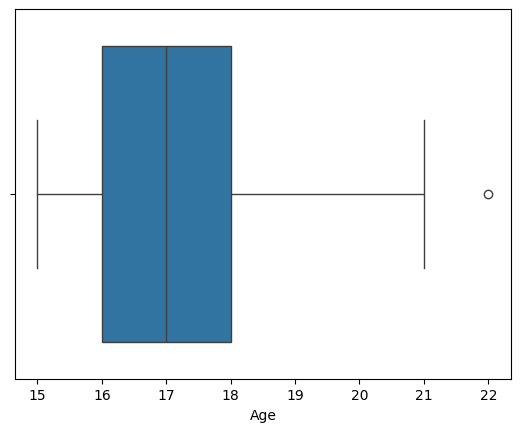

In [9]:
# Detecting Outliers

sns.boxplot(x=df_actual['Age'])


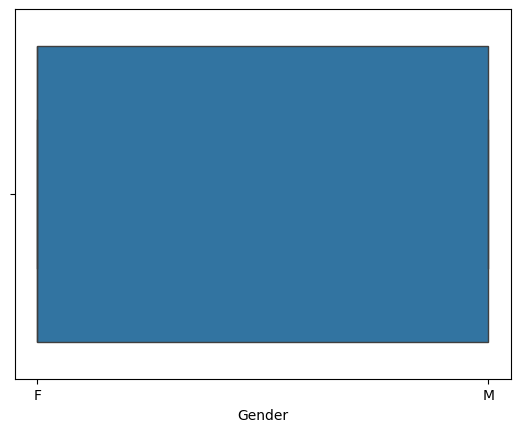

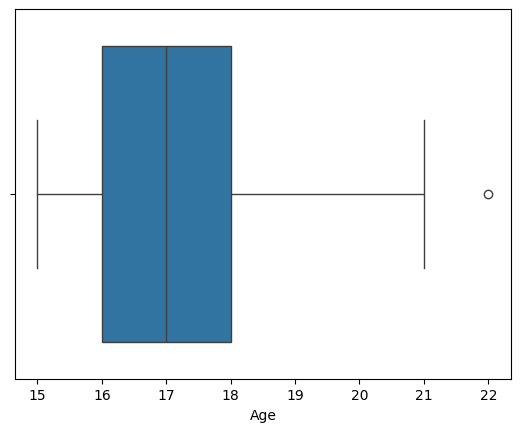

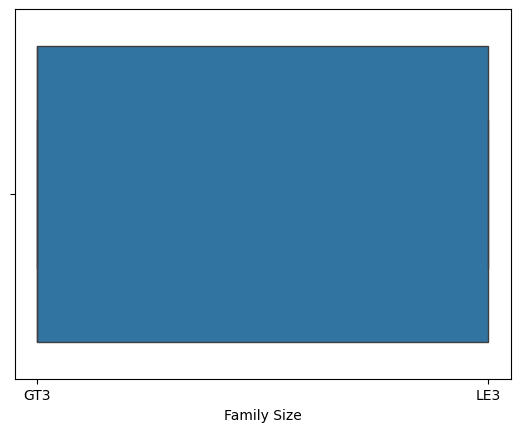

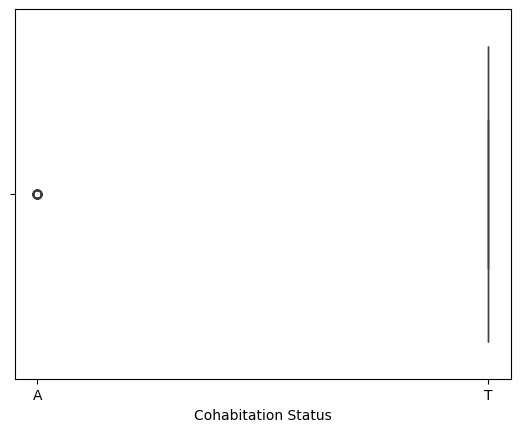

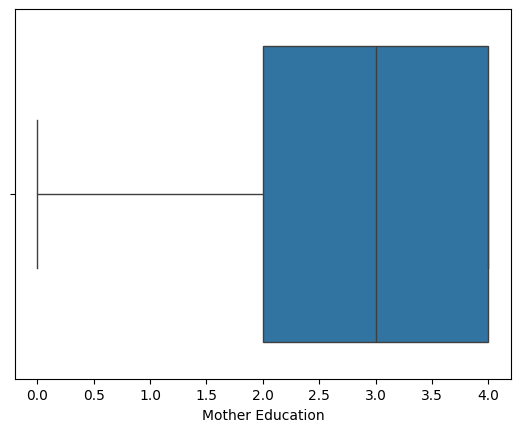

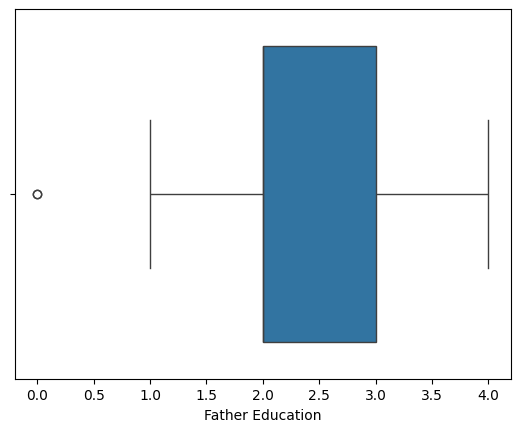

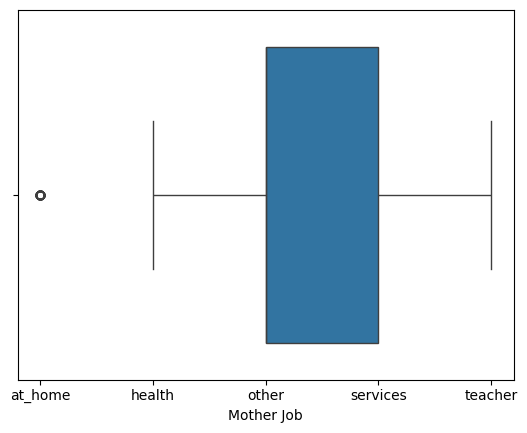

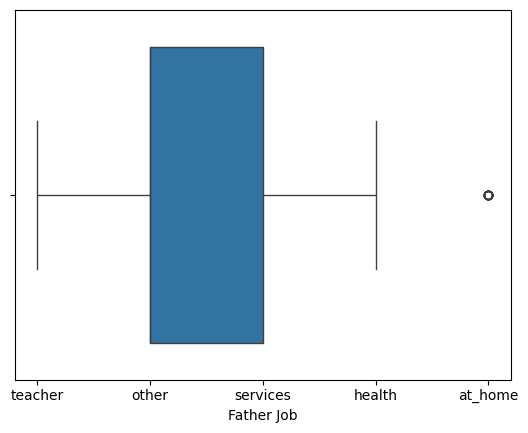

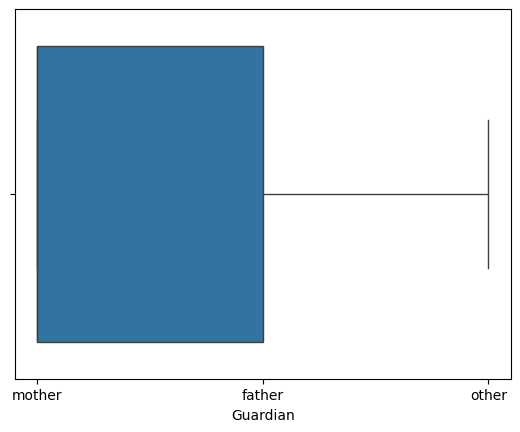

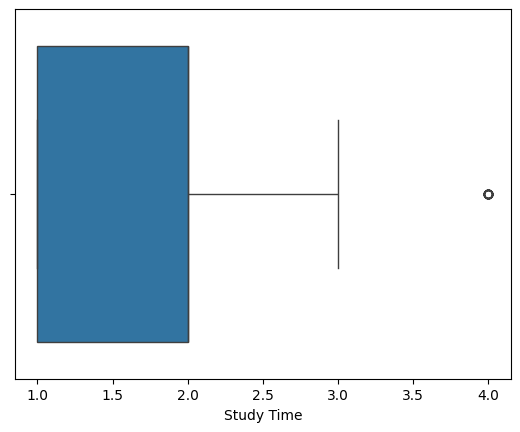

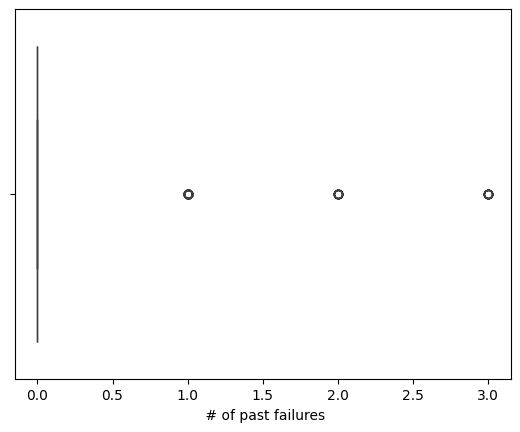

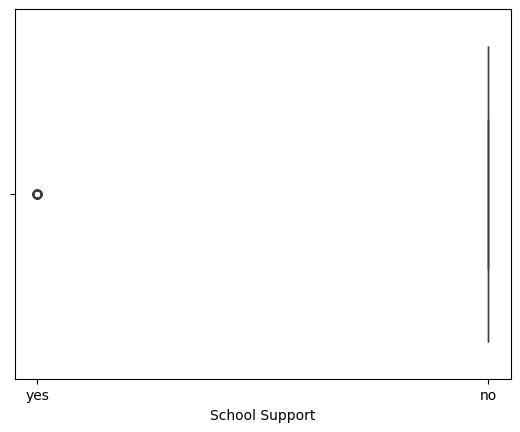

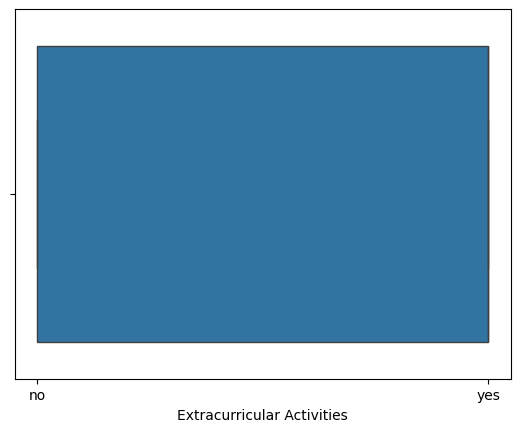

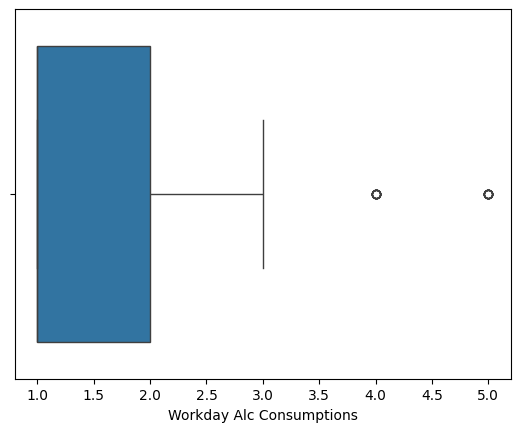

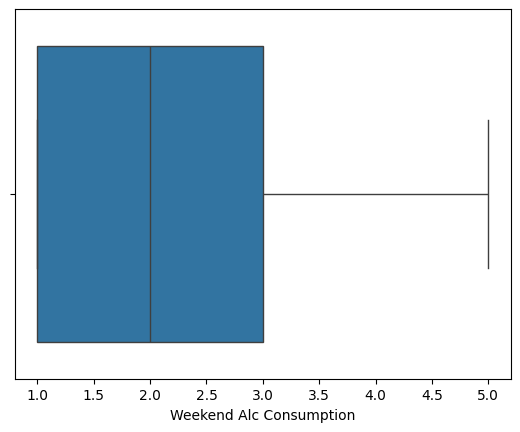

In [10]:
for variable in df_actual:
  sns.boxplot(x=df_actual[variable])
  plt.show()